In [1]:
import os, sys
import numpy as np
import ants
import argparse
import shutil
import logging
import subprocess
import tqdm
import matplotlib.pyplot as plt 

In [2]:
def plot_qc(image, mask, patient_id ='test'):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-15::5]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]]*200, cmap = 'afmhot')
        axs[i, 2].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(mask[..., idx[i]]*5000, alpha= 0.4, cmap = 'afmhot')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'{patient_id}.png', dpi=300, transparent=True)
    plt.plot()

In [154]:
mask = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/TCGA-08-0520/CT1_SEG.nii.gz')
image = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/TCGA-08-0520/T1.nii.gz')

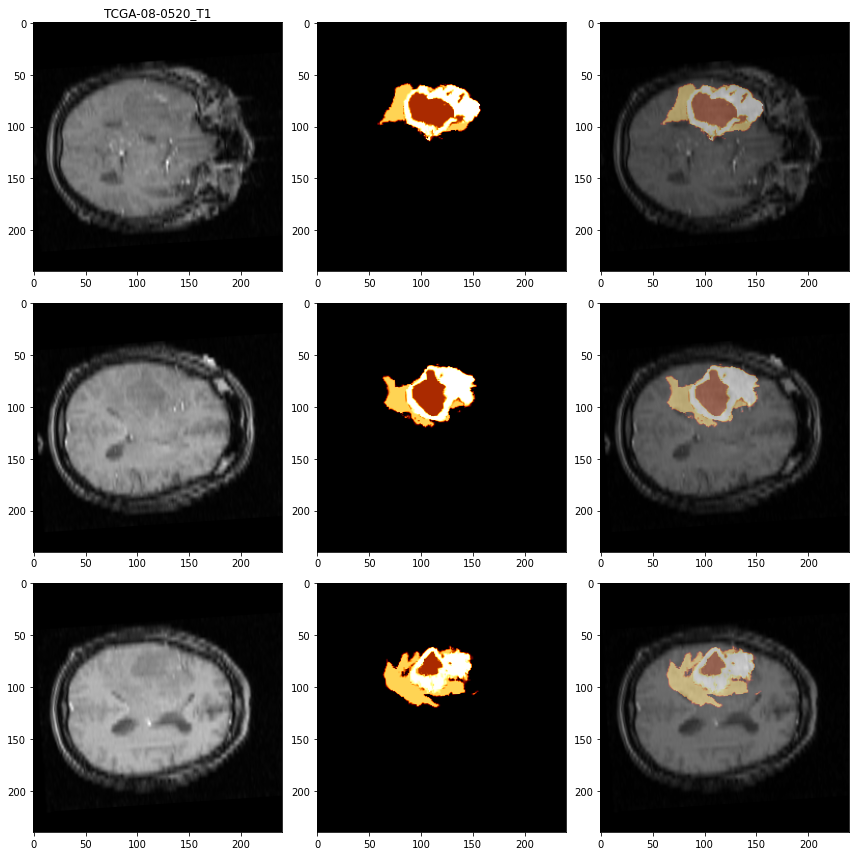

In [155]:
plot_qc(image, mask, patient_id ='TCGA-08-0520_T1')

In [39]:
mask = ants.image_read('/anvar/public_datasets/preproc_study/schw/2a_interp/VS-SEG-206/T1_SEG.nii.gz')
image = ants.image_read('/anvar/public_datasets/preproc_study/schw/2a_interp/VS-SEG-206/T1.nii.gz')

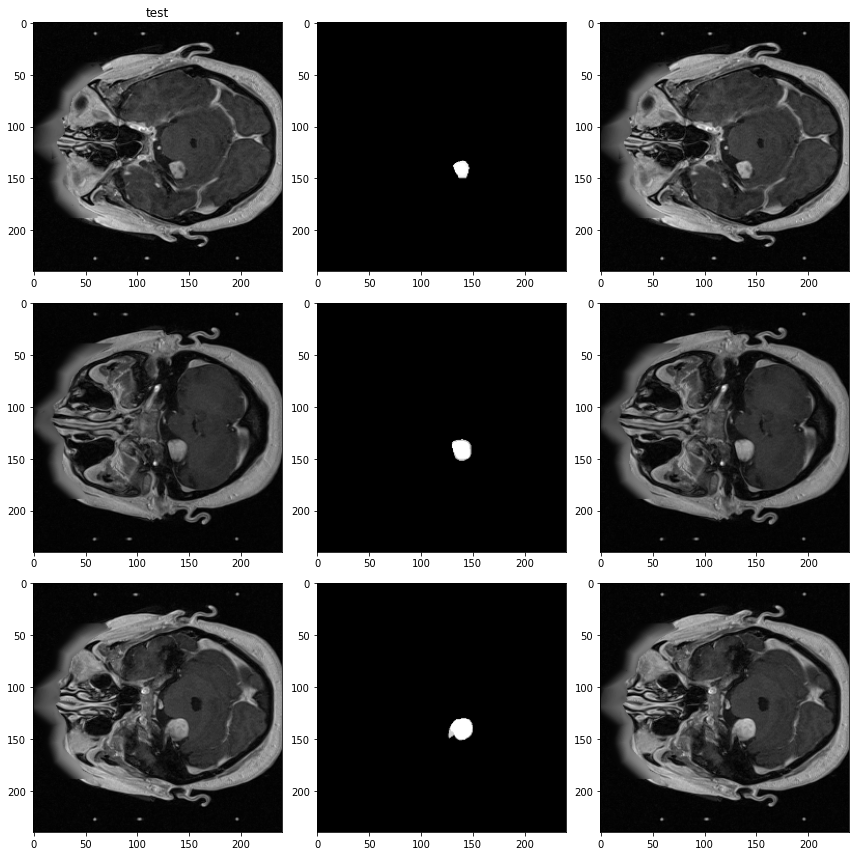

In [40]:
plot_qc(image, mask, patient_id ='test')

### Zoomed sections

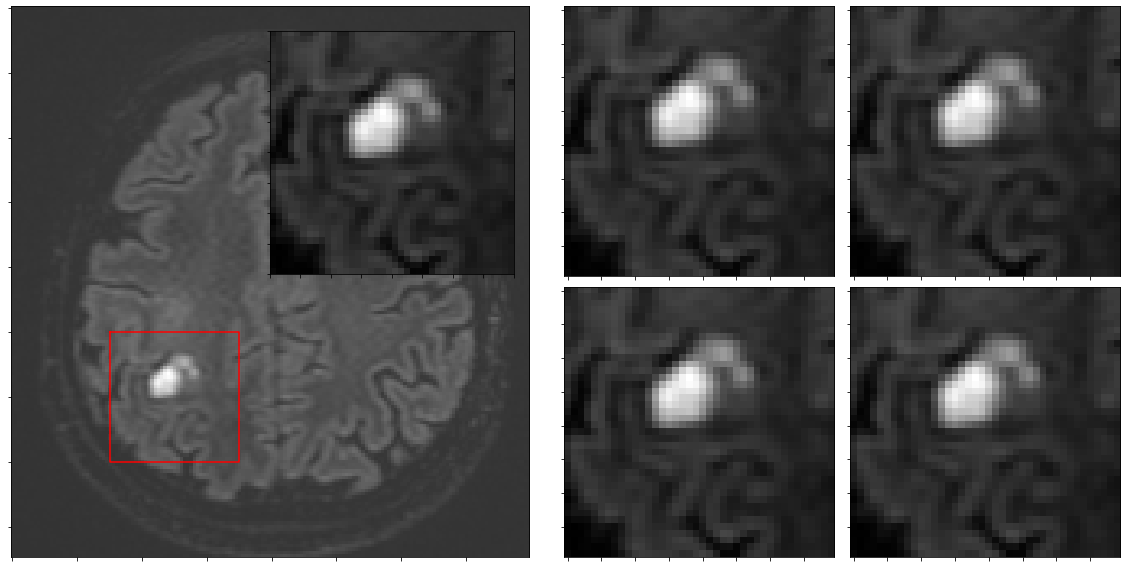

In [1]:
import matplotlib.pyplot as plt
import nibabel
import numpy as np
import pandas as pd
from pathlib import Path
from skimage.transform import rescale

root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
img = nibabel.load(root / '1_reg' / '255_18' / 'FLAIR.nii.gz')# .get_fdata()
zooms = img.header.get_zooms()

x = rescale(img.get_fdata(), zooms)
y = x[..., 170].T
y = y[::-1, :]
y = y[40:210, :]
y2 = y[100:140, 30:70]

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(y2, cmap='gray');
ax2.imshow(y2, cmap='gray');
ax3.imshow(y2, cmap='gray');
ax4.imshow(y2, cmap='gray');

axins = ax0.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.imshow(y2[::-1, :], cmap='gray', extent=(100, 140, 30, 70), origin='lower')


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([30,70,70,30, 30], [100, 100, 140, 140, 100], c='r')
    
plt.tight_layout()

(240, 240, 155)
(240, 240, 155)


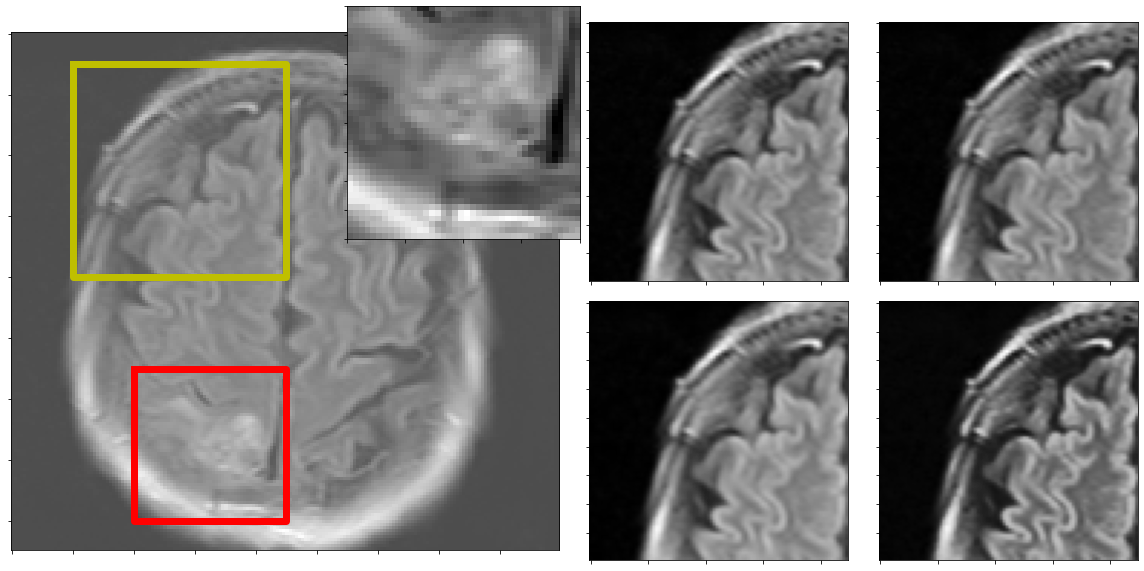

In [267]:
root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_1' / '541_18' / 'FLAIR.nii.gz')# .get_fdata()
zooms = img.header.get_zooms()
print(x.shape)
x = rescale(img.get_fdata(), zooms)
y = x[..., 115].T
y = y[::-1, :]
y = y[40:210, 30:-30]
y2 = y[10:100, 0:90]
y3 = y[120:160, 50:90]

zooms = img_n4.header.get_zooms()
print(img_n4.shape)
img_n4_x = rescale(img_n4.get_fdata(), zooms)
img_n4_y = img_n4_x[..., 115].T
img_n4_y = img_n4_y[::-1, :]
img_n4_y = img_n4_y[40:210, 30:-10]
img_n4_y2 = img_n4_y[10:100, 0:90]

zooms = img_susan.header.get_zooms()
img_susan_x = rescale(img_susan.get_fdata(), zooms)
img_susan_y = img_susan_x[..., 115].T
img_susan_y = img_susan_y[::-1, :]
img_susan_y = img_susan_y[40:210, 30:-10]
img_susan_y2 = img_susan_y[10:100, 0:90]

zooms = img_hist.header.get_zooms()
img_hist_x = rescale(img_hist.get_fdata(), zooms)
img_hist_y = img_hist_x[..., 115].T
img_hist_y = img_hist_y[::-1, :]
img_hist_y = img_hist_y[40:210, 30:-10]
img_hist_y2 = img_hist_y[10:100, 0:90]

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.7);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(y2, cmap='gray');
ax2.imshow(img_n4_y2, cmap='gray');
ax3.imshow(img_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y3[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower')


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([20, 90, 90, 20, 20], [10, 10, 80, 80, 10], c='y', linewidth=7.0, label ='Artifact')
ax0.plot([40, 90, 90, 40, 40], [110, 110, 160, 160, 110], c='r', linewidth=7.0, label = 'Tumor tissue') 
plt.savefig('512_flair_.png', dpi=300, transparent=True)
plt.tight_layout()

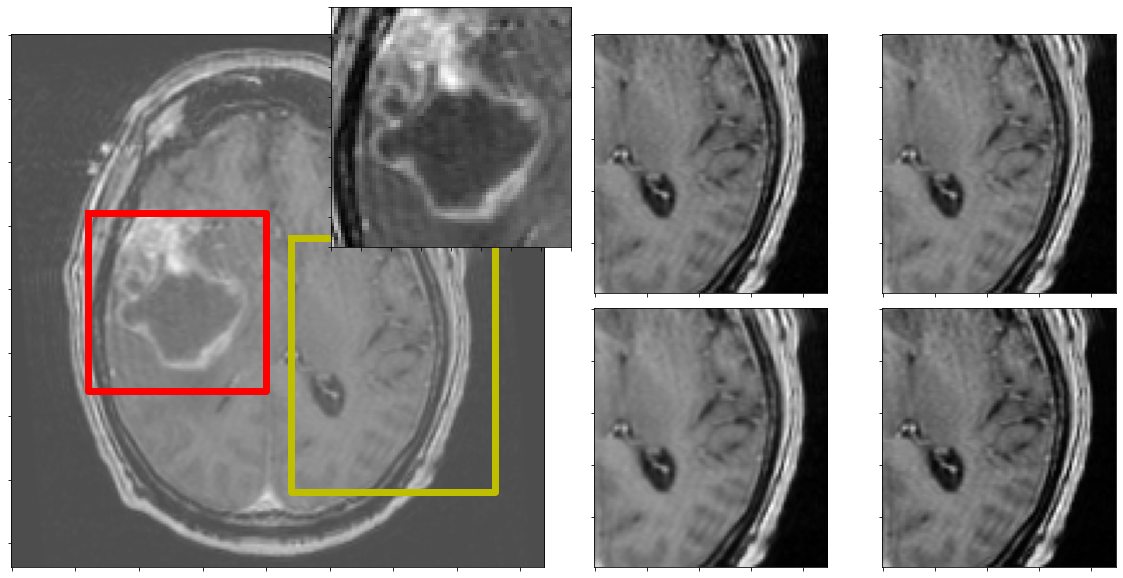

In [262]:
root = Path('/anvar/public_datasets/preproc_study/gbm/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[..., 72].T
    y = y[::-1, :]
    y = y[20:230, 20:-10]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.7);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(y2, cmap='gray');
ax2.imshow(img_n4_y2, cmap='gray');
ax3.imshow(img_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y3[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower')


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([110, 190, 190, 110, 110], [80, 80, 180, 180, 80], c='y', linewidth=7.0)
ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)   
plt.savefig('TCGA-08-0520__се1_.png', dpi=300, transparent=True)
plt.tight_layout()

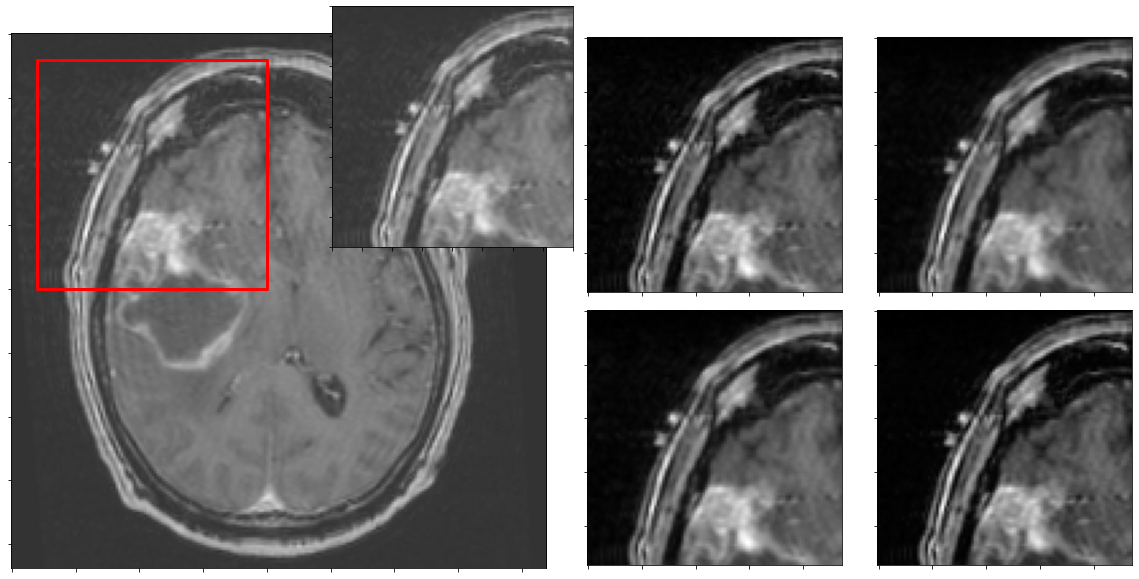

In [269]:
root = Path('/anvar/public_datasets/preproc_study/gbm/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan_n4 = nibabel.load(root / '3c_n4_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[..., 72].T
    y = y[::-1, :]
    y = y[20:230, 20:-10]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    y2 = y[5:100, 5:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)
img_n4_susan_y, img_n4_susan_y2, _ = prep_img(img_susan_n4)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(img_n4_y2, cmap='gray');
ax2.imshow(img_susan_y2, cmap='gray');
ax3.imshow(img_n4_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y2[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower', alpha=0.8)


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([10, 100, 100, 10, 10], [10, 10, 100, 100, 10], c='r', linewidth=3.0)
# ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)
plt.savefig('TCGA-08-0520_сt1_.png', dpi=300, transparent=True)
plt.tight_layout()

In [273]:
np.square(np.subtract(img_n4_susan_y2,y2)).mean()

46.899574806209124

1. Гифки
2. Гистограммы
3. Нелинейные изменения (как их визуализировать?)
4. Карта различий вычитанием изображений (?)
5. Посмотреть статьи, как рисуют их ?

>> Препроцессинг как то шакалит изображение, надо это показать
>>

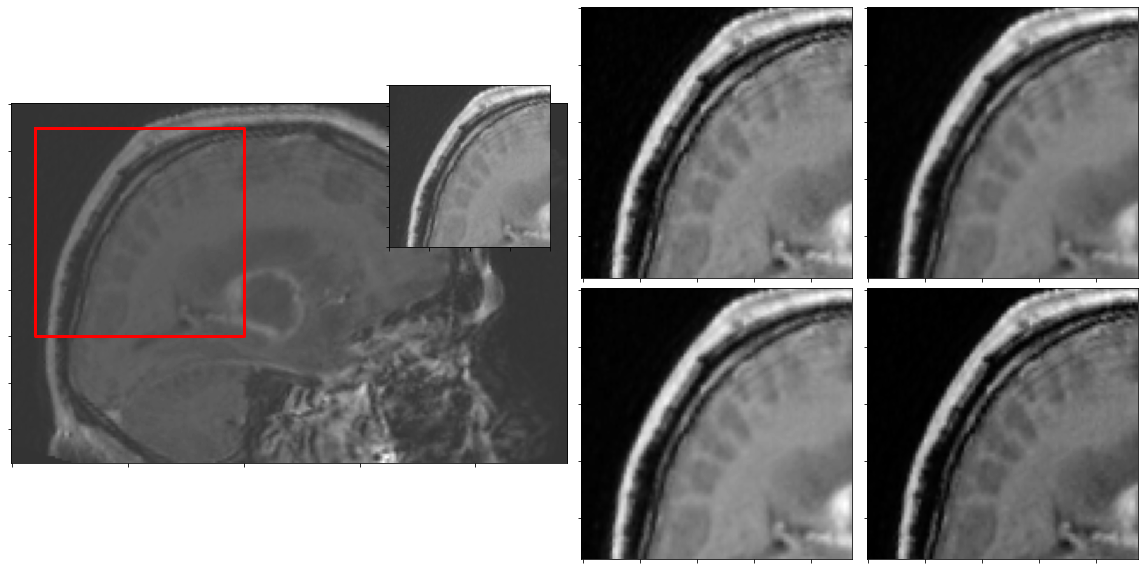

In [288]:
root = Path('/anvar/public_datasets/preproc_study/gbm/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '3b_n4' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '3d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan_n4 = nibabel.load(root / '3c_n4_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[100, ...].T
    y = y[::-1, :]
    y = y[:, :]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    y2 = y[5:100, 5:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)
img_n4_susan_y, img_n4_susan_y2, _ = prep_img(img_susan_n4)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(img_n4_y2, cmap='gray');
ax2.imshow(img_susan_y2, cmap='gray');
ax3.imshow(img_n4_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y2[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower', alpha=0.8)


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([10, 100, 100, 10, 10], [10, 10, 100, 100, 10], c='r', linewidth=3.0)
# ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)
plt.savefig('TCGA-08-0520_sag_.png', dpi=300, transparent=True)
plt.tight_layout()

### 5. Choosing images by KL

In [38]:
import scipy
def compute_kl(img1, img2, brain, mask, _bin_heuristics = 30):
    size, _bins = np.histogram(img1[brain.astype(bool)], bins = _bin_heuristics)
    bins = [(_bins[i]+_bins[i+1])/2 for i in range(len(_bins)-1)]

    size_healthy1, bin_edges = np.histogram(img1[brain.astype(bool)^mask.astype(bool)].reshape(-1), bins=_bins)
    size_tumor1, _ = np.histogram(img1[mask.astype(bool)].reshape(-1), bins = _bins)
    
    size_healthy2, bin_edges = np.histogram(img2[brain.astype(bool)^mask.astype(bool)].reshape(-1), bins=_bins)
    size_tumor2, _ = np.histogram(img2[mask.astype(bool)].reshape(-1), bins = _bins)

    size_healthy1 = np.round(size_healthy1/size_healthy1.sum(), 5)
    size_tumor1 = np.round(size_tumor1/size_tumor1.sum(), 5)
    
    size_healthy1 = np.where(size_healthy1>10e-6, size_healthy1, 10e-6)
    size_tumor1 = np.where(size_tumor1>10e-6, size_tumor1, 10e-6)
    
    
    size_healthy2 = np.round(size_healthy2/size_healthy2.sum(), 5)
    size_tumor2 = np.round(size_tumor2/size_tumor2.sum(), 5)
    
    size_healthy2 = np.where(size_healthy2>10e-6, size_healthy2, 10e-6)
    size_tumor2 = np.where(size_tumor2>10e-6, size_tumor2, 10e-6)
    
    

#     kl_dist = 0
#     for h,t in zip(size_healthy1, size_healthy2):
#         kl_dist += h * np.log2(h/t)

    kl_dist = scipy.spatial.distance.jensenshannon(size_healthy1,size_healthy2)
#     kl_dist = scipy.special.entr(size_healthy, size_tumor)
        
            
    return kl_dist, size_healthy1, size_tumor1, _bins

In [39]:
dataset = 'bgpd'
main_img = 'FLAIR.nii.gz'
label_name = 'mask_GTV_FLAIR.nii.gz'
mask_name = 'FLAIR_mask.nii.gz'

In [65]:
from pathlib import Path
import nibabel

root = '/anvar/public_datasets/preproc_study/{}/4a_resamp/'.format(dataset) 
root2 = '/anvar/public_datasets/preproc_study/{}/4b_n4/'.format(dataset)
mask_root = '/anvar/public_datasets/preproc_study/{}/5_ss_shared/'.format(dataset)

all_kl = []

for patient in tqdm.tqdm(os.listdir(root)):
    if Path(root + patient).is_dir():
        img1 = nibabel.load(root + patient + '/' + main_img).get_fdata()
        img2 = nibabel.load(root2 + patient + '/' + main_img).get_fdata()
        mask = nibabel.load(root2 + patient + '/' + label_name).get_fdata()
        brain = nibabel.load(mask_root + patient +'/' + mask_name).get_fdata()
        
        kl, _, _, _ = compute_kl(img1, img2, brain, mask)
        all_kl.append(kl)

100%|██████████| 180/180 [05:01<00:00,  1.68s/it]


In [66]:
root2 + patient + '/' + main_img

'/anvar/public_datasets/preproc_study/bgpd/4b_n4/788_18/FLAIR.nii.gz'

In [67]:
np.max(all_kl)

0.0982159069524202

In [68]:
np.where(all_kl == np.max(all_kl))

(array([164]),)

In [55]:
patient = os.listdir('/anvar/public_datasets/preproc_study/bgpd/4a_resamp')[164]
# susan '1788_18_4'

'1788_18_4'

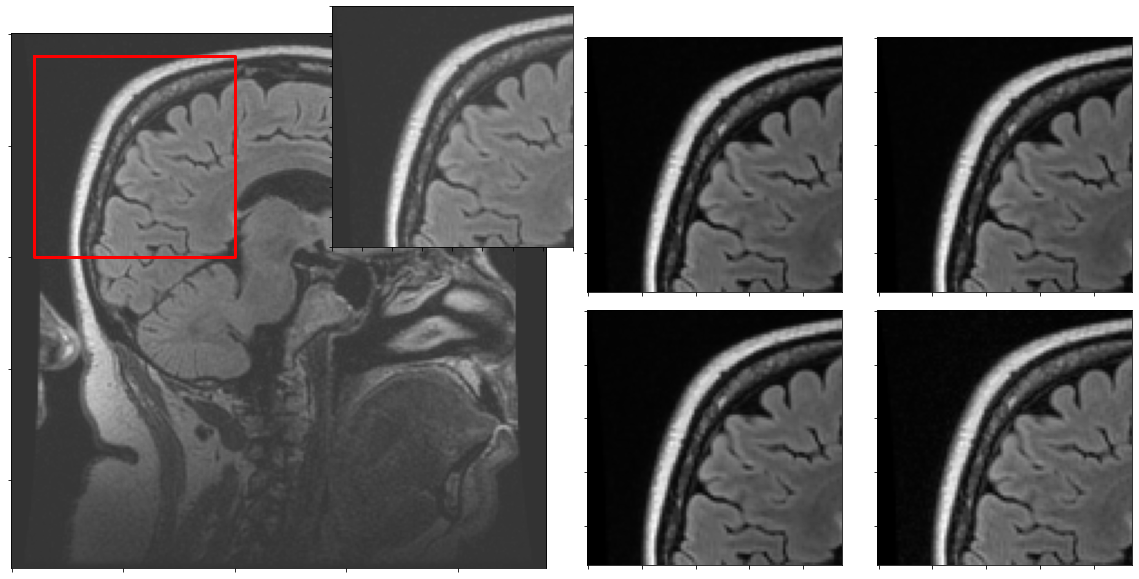

In [58]:
from skimage.transform import rescale

root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
img = nibabel.load(root / '4a_resamp' / patient / main_img)# .get_fdata()
img_n4 = nibabel.load(root / '4b_n4' / patient / main_img)# .get_fdata()
img_susan = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_susan_n4 = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / patient / main_img)# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[100, ...].T
    y = y[::-1, :]
    y = y[:, :]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    y2 = y[5:100, 5:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)
img_n4_susan_y, img_n4_susan_y2, _ = prep_img(img_susan_n4)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(img_n4_y2, cmap='gray');
ax2.imshow(img_susan_y2, cmap='gray');
ax3.imshow(img_n4_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y2[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower', alpha=0.8)


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([10, 100, 100, 10, 10], [10, 10, 100, 100, 10], c='r', linewidth=3.0)
# ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)
plt.savefig('bgpd_164_.png', dpi=300, transparent=True)
plt.tight_layout()

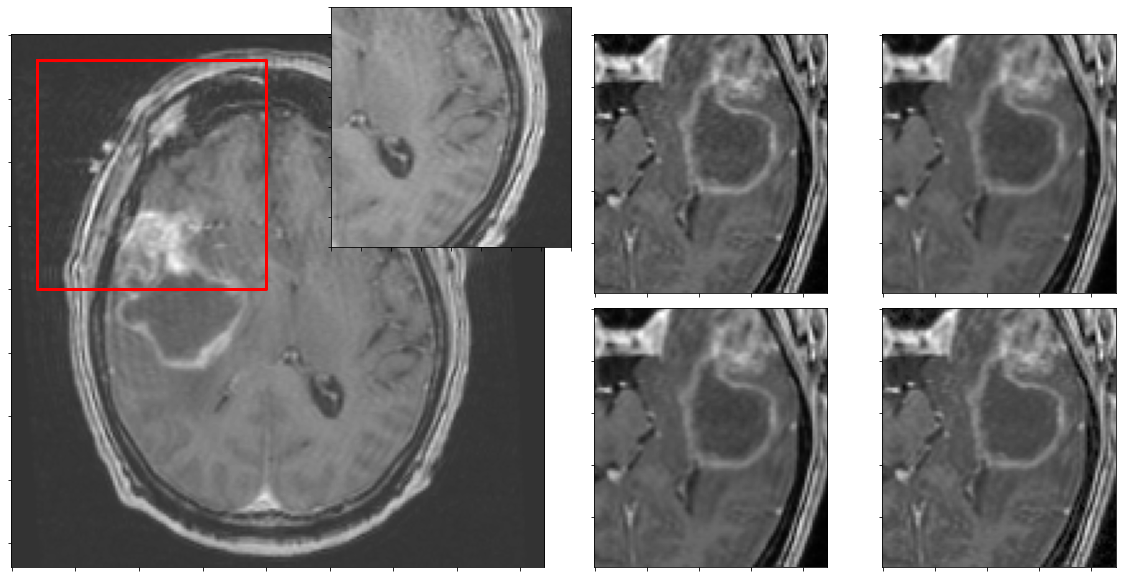

In [70]:
root = Path('/anvar/public_datasets/preproc_study/gbm/') # 1_reg/255_18'
img = nibabel.load(root / '3a_atlas' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_n4 = nibabel.load(root / '4b_n4' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan = nibabel.load(root / '4d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_susan_n4 = nibabel.load(root / '4d_susan' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / 'TCGA-08-0520' / 'CT1.nii.gz')# .get_fdata()

def prep_img(img):
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[..., 72].T
    y = y[::-1, :]
    y = y[20:230, 20:-10]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)
img_n4_y, img_n4_y2, _ = prep_img(img_n4)
img_hist_y, img_hist_y2, _ = prep_img(img_hist)
img_susan_y, img_susan_y2, _ = prep_img(img_susan)
img_n4_susan_y, img_n4_susan_y2, _ = prep_img(img_susan_n4)

fig = plt.figure(figsize=(16,8))
ax0 = plt.subplot2grid((2, 4), (0, 0), colspan=2, rowspan=2)
ax0.imshow(y, cmap='gray', alpha=0.8);

ax1 = plt.subplot2grid((2, 4), (0, 2))
ax2 = plt.subplot2grid((2, 4), (0, 3))
ax3 = plt.subplot2grid((2, 4), (1, 2))
ax4 = plt.subplot2grid((2, 4), (1, 3))

ax1.imshow(img_n4_y2, cmap='gray');
ax2.imshow(img_susan_y2, cmap='gray');
ax3.imshow(img_n4_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');

axins = ax0.inset_axes([0.6, 0.6, 0.45, 0.45])
axins.imshow(y2[::-1, :], cmap='gray', extent=(120, 160, 80, 120), origin='lower', alpha=0.8)


for ax in [ax0, ax1, ax2, ax3, ax4, axins]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax0.plot([10, 100, 100, 10, 10], [10, 10, 100, 100, 10], c='r', linewidth=3.0)
# ax0.plot([30, 100, 100, 30, 30], [70, 70, 140, 140, 70], c='r', linewidth=7.0)
# plt.savefig('TCGA-08-520_сt1_4a.png', dpi=300, transparent=True)
plt.tight_layout()

### 5. Plotting distributions

In [102]:
def prep_img(img, z_slice = 170):
    
    zooms = img.header.get_zooms()
    x = rescale(img.get_fdata(), zooms)
    y = x[..., z_slice].T
    print(x.shape)
    y = y[::-1, :]
#     y = y[20:230, 20:-10]
    y = y[:,:]
    y2 = y[80:180, 100:190]
    y3 = y[70:140, 30:100]
    return (y, y2, y3)

y, y2, y3 = prep_img(img)

(216, 240, 240)


(216, 240, 240)


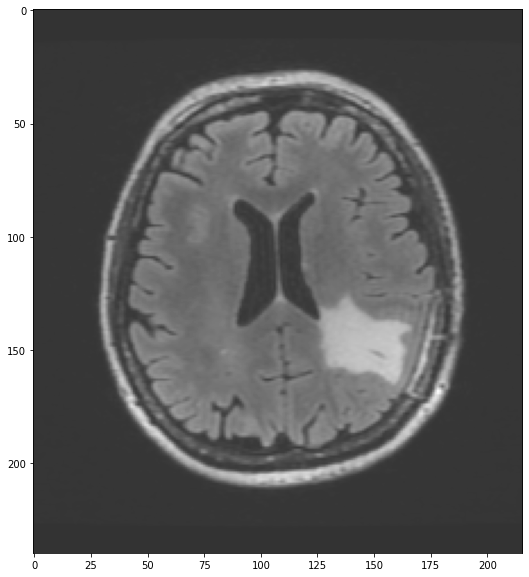

In [104]:
root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
img = nibabel.load(root / '4a_resamp' / patient / main_img)# .get_fdata()
img_n4 = nibabel.load(root / '4b_n4' / patient / main_img)# .get_fdata()
img_susan = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_susan_n4 = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / patient / main_img)# .get_fdata()

fig = plt.figure(figsize=(20,10))
y, y2, y3 = prep_img(img_n4)
plt.imshow(y, cmap='gray', alpha=0.8);

AttributeError: 'GridSpec' object has no attribute 'flat'

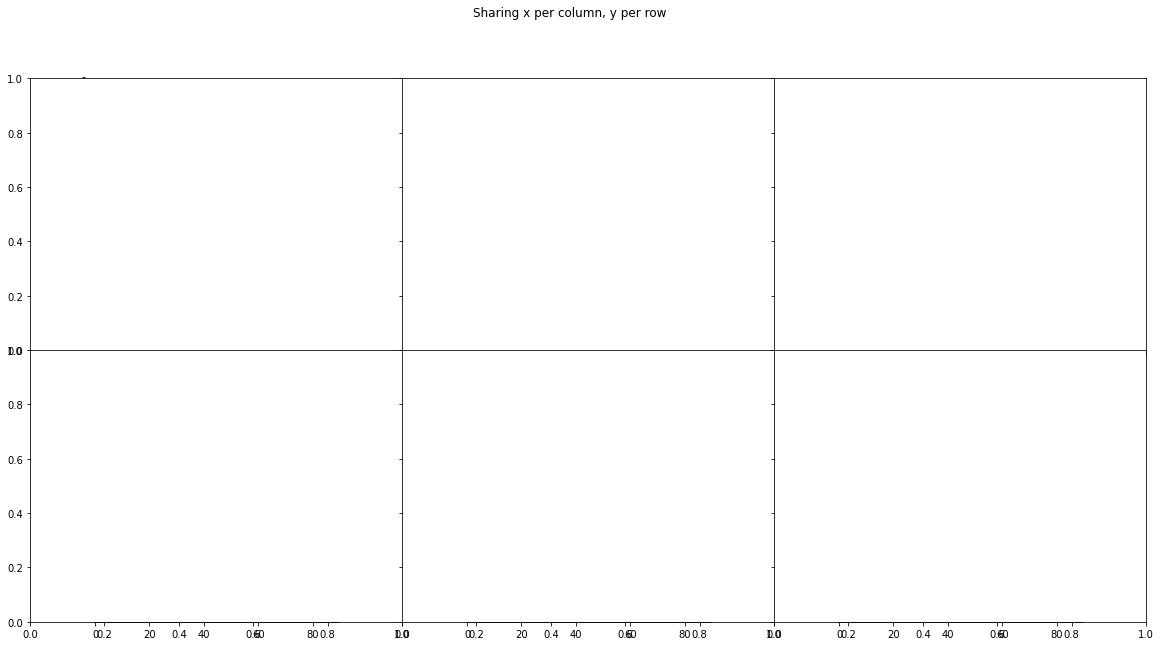

In [123]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
(ax1, ax2, ax3), (ax4, ax5, ax6) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.imshow(img_n4_y2, cmap='gray');
ax2.imshow(img_susan_y2, cmap='gray');
ax3.imshow(img_n4_susan_y2, cmap='gray');
ax4.imshow(img_hist_y2, cmap='gray');
ax5.imshow(img_n4_susan_y2, cmap='gray');
ax6.imshow(img_hist_y2, cmap='gray');
axs = gs.subplots(sharex=True, sharey=True)


for ax in gs.flat:
    ax.label_outer()

(200, 200, 142)
(200, 200, 142)
(200, 200, 142)
(200, 200, 142)


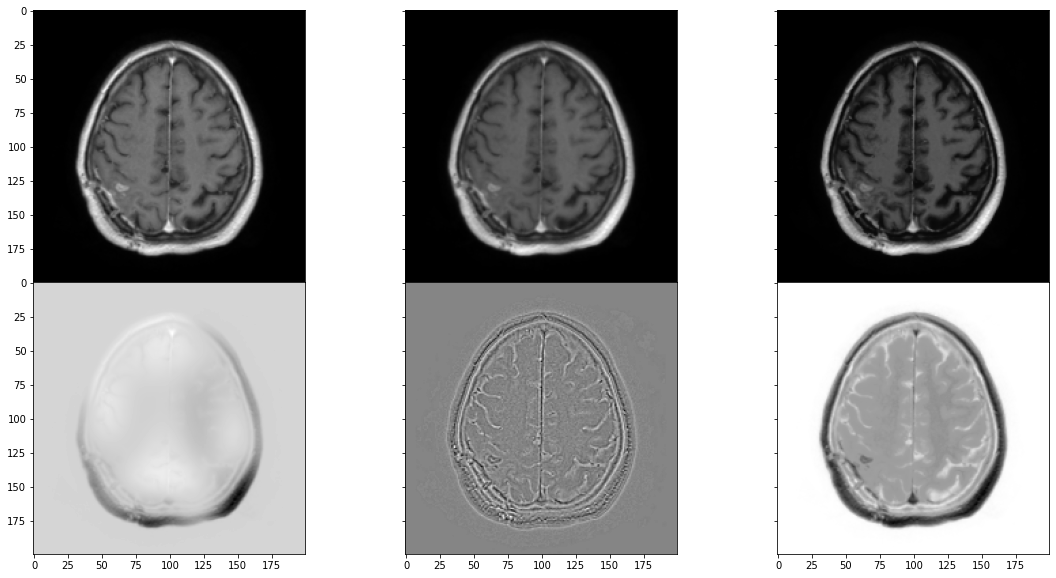

In [169]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)

root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
patient = os.listdir('/anvar/public_datasets/preproc_study/gbm/4a_resamp')[19]
patient = os.listdir('/anvar/public_datasets/preproc_study/bgpd/4a_resamp')[164]

main_img = 'CT1.nii.gz'
img = nibabel.load(root / '4a_resamp' / patient / main_img)# .get_fdata()
img_n4 = nibabel.load(root / '4b_n4' / patient / main_img)# .get_fdata()
img_susan = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_susan_n4 = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / patient / main_img)# .get_fdata()

z_slice = 105

y, _, _ = prep_img(img, z_slice)
y_n4, _, _ = prep_img(img_n4, z_slice)
y_susan, _, _ = prep_img(img_susan, z_slice)
y_hist, _, _ = prep_img(img_hist, z_slice)

axs[0,0].imshow(y_n4, cmap='gray');
axs[0,1].imshow(y_susan, cmap='gray');
axs[0,2].imshow(y_hist, cmap='gray');
axs[1,0].imshow(y_n4 - y , cmap='gray');
axs[1,1].imshow(y_susan - y, cmap='gray');
axs[1,2].imshow(y_hist - y, cmap='gray');

# plt.savefig('oblazazlsya.png', dpi=500, transparent=True)
# # Hide x labels and tick labels for all but bottom plot.
# for ax in axs:
#     ax.label_outer()

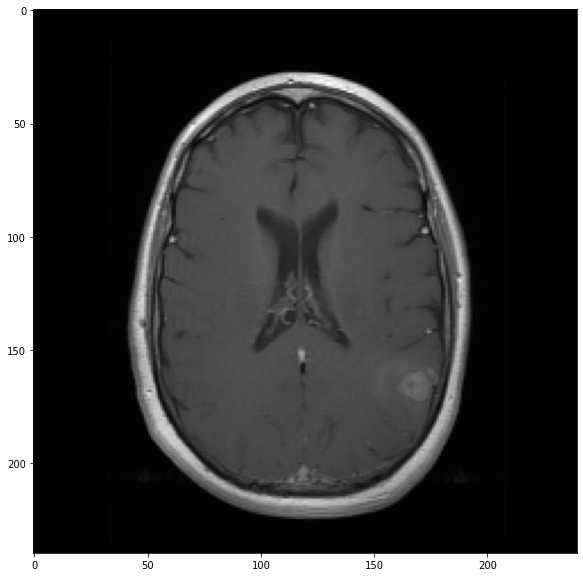

In [157]:
fig = plt.figure(figsize=(20,10))
plt.imshow(y, cmap='gray');

In [125]:
np.allclose(y_n4 - y , y_susan - y)

True

(176, 270, 149)
(176, 270, 149)
(176, 270, 149)
(176, 270, 149)


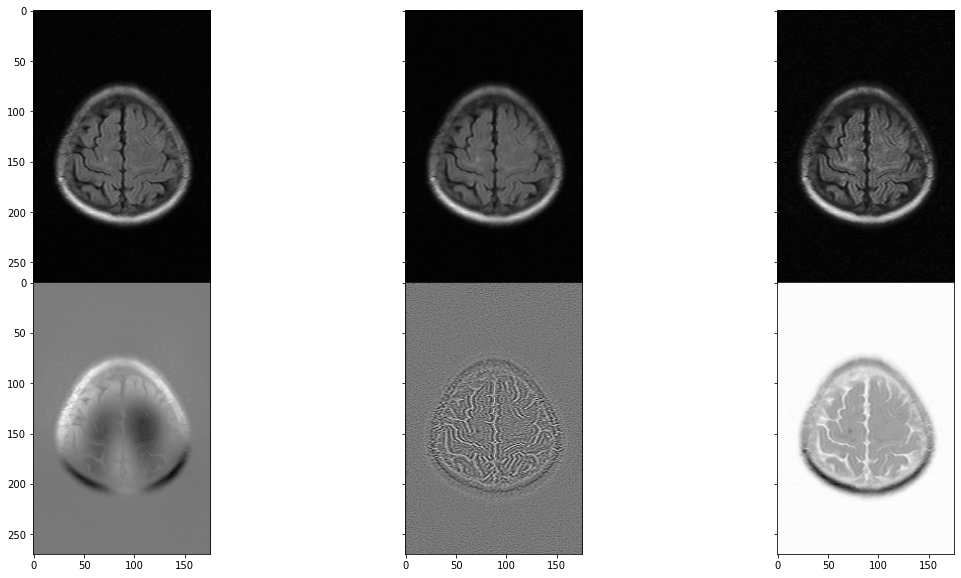

In [166]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2, 3, hspace=0, wspace=0)
axs = gs.subplots(sharex=True, sharey=True)

root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
patient = os.listdir('/anvar/public_datasets/preproc_study/bgpd/4a_resamp')[90]

main_img = 'FLAIR.nii.gz'
img = nibabel.load(root / '4a_resamp' / patient / main_img)# .get_fdata()
img_n4 = nibabel.load(root / '4b_n4' / patient / main_img)# .get_fdata()
img_susan = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_susan_n4 = nibabel.load(root / '4d_susan' / patient / main_img)# .get_fdata()
img_hist = nibabel.load(root / '6_hist/6_hist_fold_0/' / patient / main_img)# .get_fdata()
z_slice = 120

y, _, _ = prep_img(img, z_slice)
y_n4, _, _ = prep_img(img_n4, z_slice)
y_susan, _, _ = prep_img(img_susan, z_slice)
y_hist, _, _ = prep_img(img_hist, z_slice)

axs[0,0].imshow(y_n4, cmap='gray');
axs[0,1].imshow(y_susan, cmap='gray');
axs[0,2].imshow(y_hist, cmap='gray');
axs[1,0].imshow(y_n4 - y , cmap='gray');
axs[1,1].imshow(y_susan - y, cmap='gray');
axs[1,2].imshow(y_hist - y, cmap='gray');

## Checking creation time

In [163]:
os.listdir('/anvar/public_datasets/preproc_study/bgpd/4b_n4_/1019_18')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T1.nii.gz',
 'mask_GTV_FLAIR.nii.gz',
 'CT1.nii.gz']

In [159]:
root = Path('/anvar/public_datasets/preproc_study/bgpd/') # 1_reg/255_18'
patient = os.listdir('/anvar/public_datasets/preproc_study/bgpd/4a_resamp')[19]

import os.path, time
print("last modified: %s" % time.ctime(os.path.getmtime(str(root / '4b_n4' / patient / main_img))))
print("created: %s" % time.ctime(os.path.getctime(str(root / '4b_n4' / patient / main_img))))

last modified: Tue Aug  2 00:35:43 2022
created: Tue Aug  2 00:35:43 2022


In [160]:
print("last modified: %s" % time.ctime(os.path.getmtime(str(root / '4d_susan' / patient / main_img))))
print("created: %s" % time.ctime(os.path.getctime(str(root / '4d_susan' / patient / main_img))))

last modified: Tue Aug  2 11:50:20 2022
created: Tue Aug  2 11:50:20 2022
